In [4]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
sns.mpl.rc("figure", figsize=(16, 6))

In [5]:
gross_data = pd.read_csv('https://raw.githubusercontent.com/tacookson/data/master/broadway-grosses/grosses.csv',parse_dates = ['week_ending'])
show_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/show_info_1985-2019.csv')
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])

In [6]:
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])
CPI_data.rename(columns = {'CWSR0000SA0':'CPI'}, inplace = True)
gross_data['year'] = gross_data['week_ending'].dt.year
gross_data['month_c'] = [d.strftime('%b') for d in gross_data.week_ending]
gross_data['month'] = gross_data['week_ending'].dt.month
CPI_data['year'] = CPI_data['DATE'].dt.year
CPI_data['month']= CPI_data['DATE'].dt.month
gross_data


,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,3915937.00,42nd Street,St. James Theatre,282368.00,NaN,30.42,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,3915937.00,A Chorus Line,Sam S. Shubert Theatre,222584.00,NaN,27.25,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,3915937.00,Aren't We All?,Brooks Atkinson Theatre,249272.00,NaN,33.75,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,3915937.00,Arms and the Man,Circle in the Square Theatre,95688.00,NaN,20.87,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,3915937.00,As Is,Lyceum Theatre,61059.00,NaN,20.78,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,26109896.25,The Phantom of the Opera,Majestic Theatre,639215.93,1358986.0,72.18,213.0,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,26109896.25,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1320766.00,1566688.0,132.02,297.0,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,26109896.25,To Kill A Mockingbird,Sam S. Shubert Theatre,1132278.54,1549625.0,115.41,423.0,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,26109896.25,West Side Story,Broadway Theatre,1598947.32,1722464.0,114.87,373.0,13920,1740,1.0000,8,0,2020,Mar,3


In [7]:
CPI_data['CPI'] = CPI_data.iloc[-1]['CPI']/CPI_data['CPI']
CPI_data

,DATE,CPI,year,month
0,1947-01-01,13.148889,1947,1
1,1947-02-01,13.064213,1947,2
2,1947-03-01,12.839783,1947,3
3,1947-04-01,12.839783,1947,4
4,1947-05-01,12.863043,1947,5
...,...,...,...,...
899,2021-12-01,1.031327,2021,12
900,2022-01-01,1.024507,2022,1
901,2022-02-01,1.015750,2022,2
902,2022-03-01,1.001908,2022,3


In [8]:
CPI_data2 = CPI_data[['CPI','month','year']]
gross_data2 = gross_data.merge(CPI_data2, how = 'left', on = ['month', 'year'])
gross_data['weekly_gross_overall'] = gross_data2['weekly_gross_overall']*gross_data2['CPI']
gross_data['weekly_gross'] = gross_data2['weekly_gross']*gross_data2['CPI']
gross_data['avg_ticket_price'] = gross_data2['avg_ticket_price']*gross_data2['CPI']
gross_data['potential_gross'] = gross_data2['potential_gross']*gross_data2['CPI']
gross_data['top_ticket_price']= gross_data2['top_ticket_price']*gross_data2['CPI']
gross_data['year']=gross_data.year.astype(int).astype(str)
gross_data


,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,1.040401e+07,42nd Street,St. James Theatre,7.502061e+05,NaN,80.821017,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,1.040401e+07,A Chorus Line,Sam S. Shubert Theatre,5.913697e+05,NaN,72.398840,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,1.040401e+07,Aren't We All?,Brooks Atkinson Theatre,6.622754e+05,NaN,89.668288,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,1.040401e+07,Arms and the Man,Circle in the Square Theatre,2.542275e+05,NaN,55.448213,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,1.040401e+07,As Is,Lyceum Theatre,1.622239e+05,NaN,55.209097,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,2.949006e+07,The Phantom of the Opera,Majestic Theatre,7.219681e+05,1.534919e+06,81.524345,240.574751,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,2.949006e+07,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1.491751e+06,1.769510e+06,149.111167,335.449300,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,2.949006e+07,To Kill A Mockingbird,Sam S. Shubert Theatre,1.278862e+06,1.750238e+06,130.350854,477.761125,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,2.949006e+07,West Side Story,Broadway Theatre,1.805945e+06,1.945452e+06,129.740947,421.288179,13920,1740,1.0000,8,0,2020,Mar,3


In [7]:
gross_data = gross_data[['seats_sold','week_ending','year','month']]
gross_data2 = gross_data.groupby(['month','year']).sum().reset_index()
gross_data2

,month,year,seats_sold
0,1,1986,537301
1,1,1987,479118
2,1,1988,742268
3,1,1989,746674
4,1,1990,572650
...,...,...,...
413,12,2015,833895
414,12,2016,1061842
415,12,2017,1315511
416,12,2018,1614976


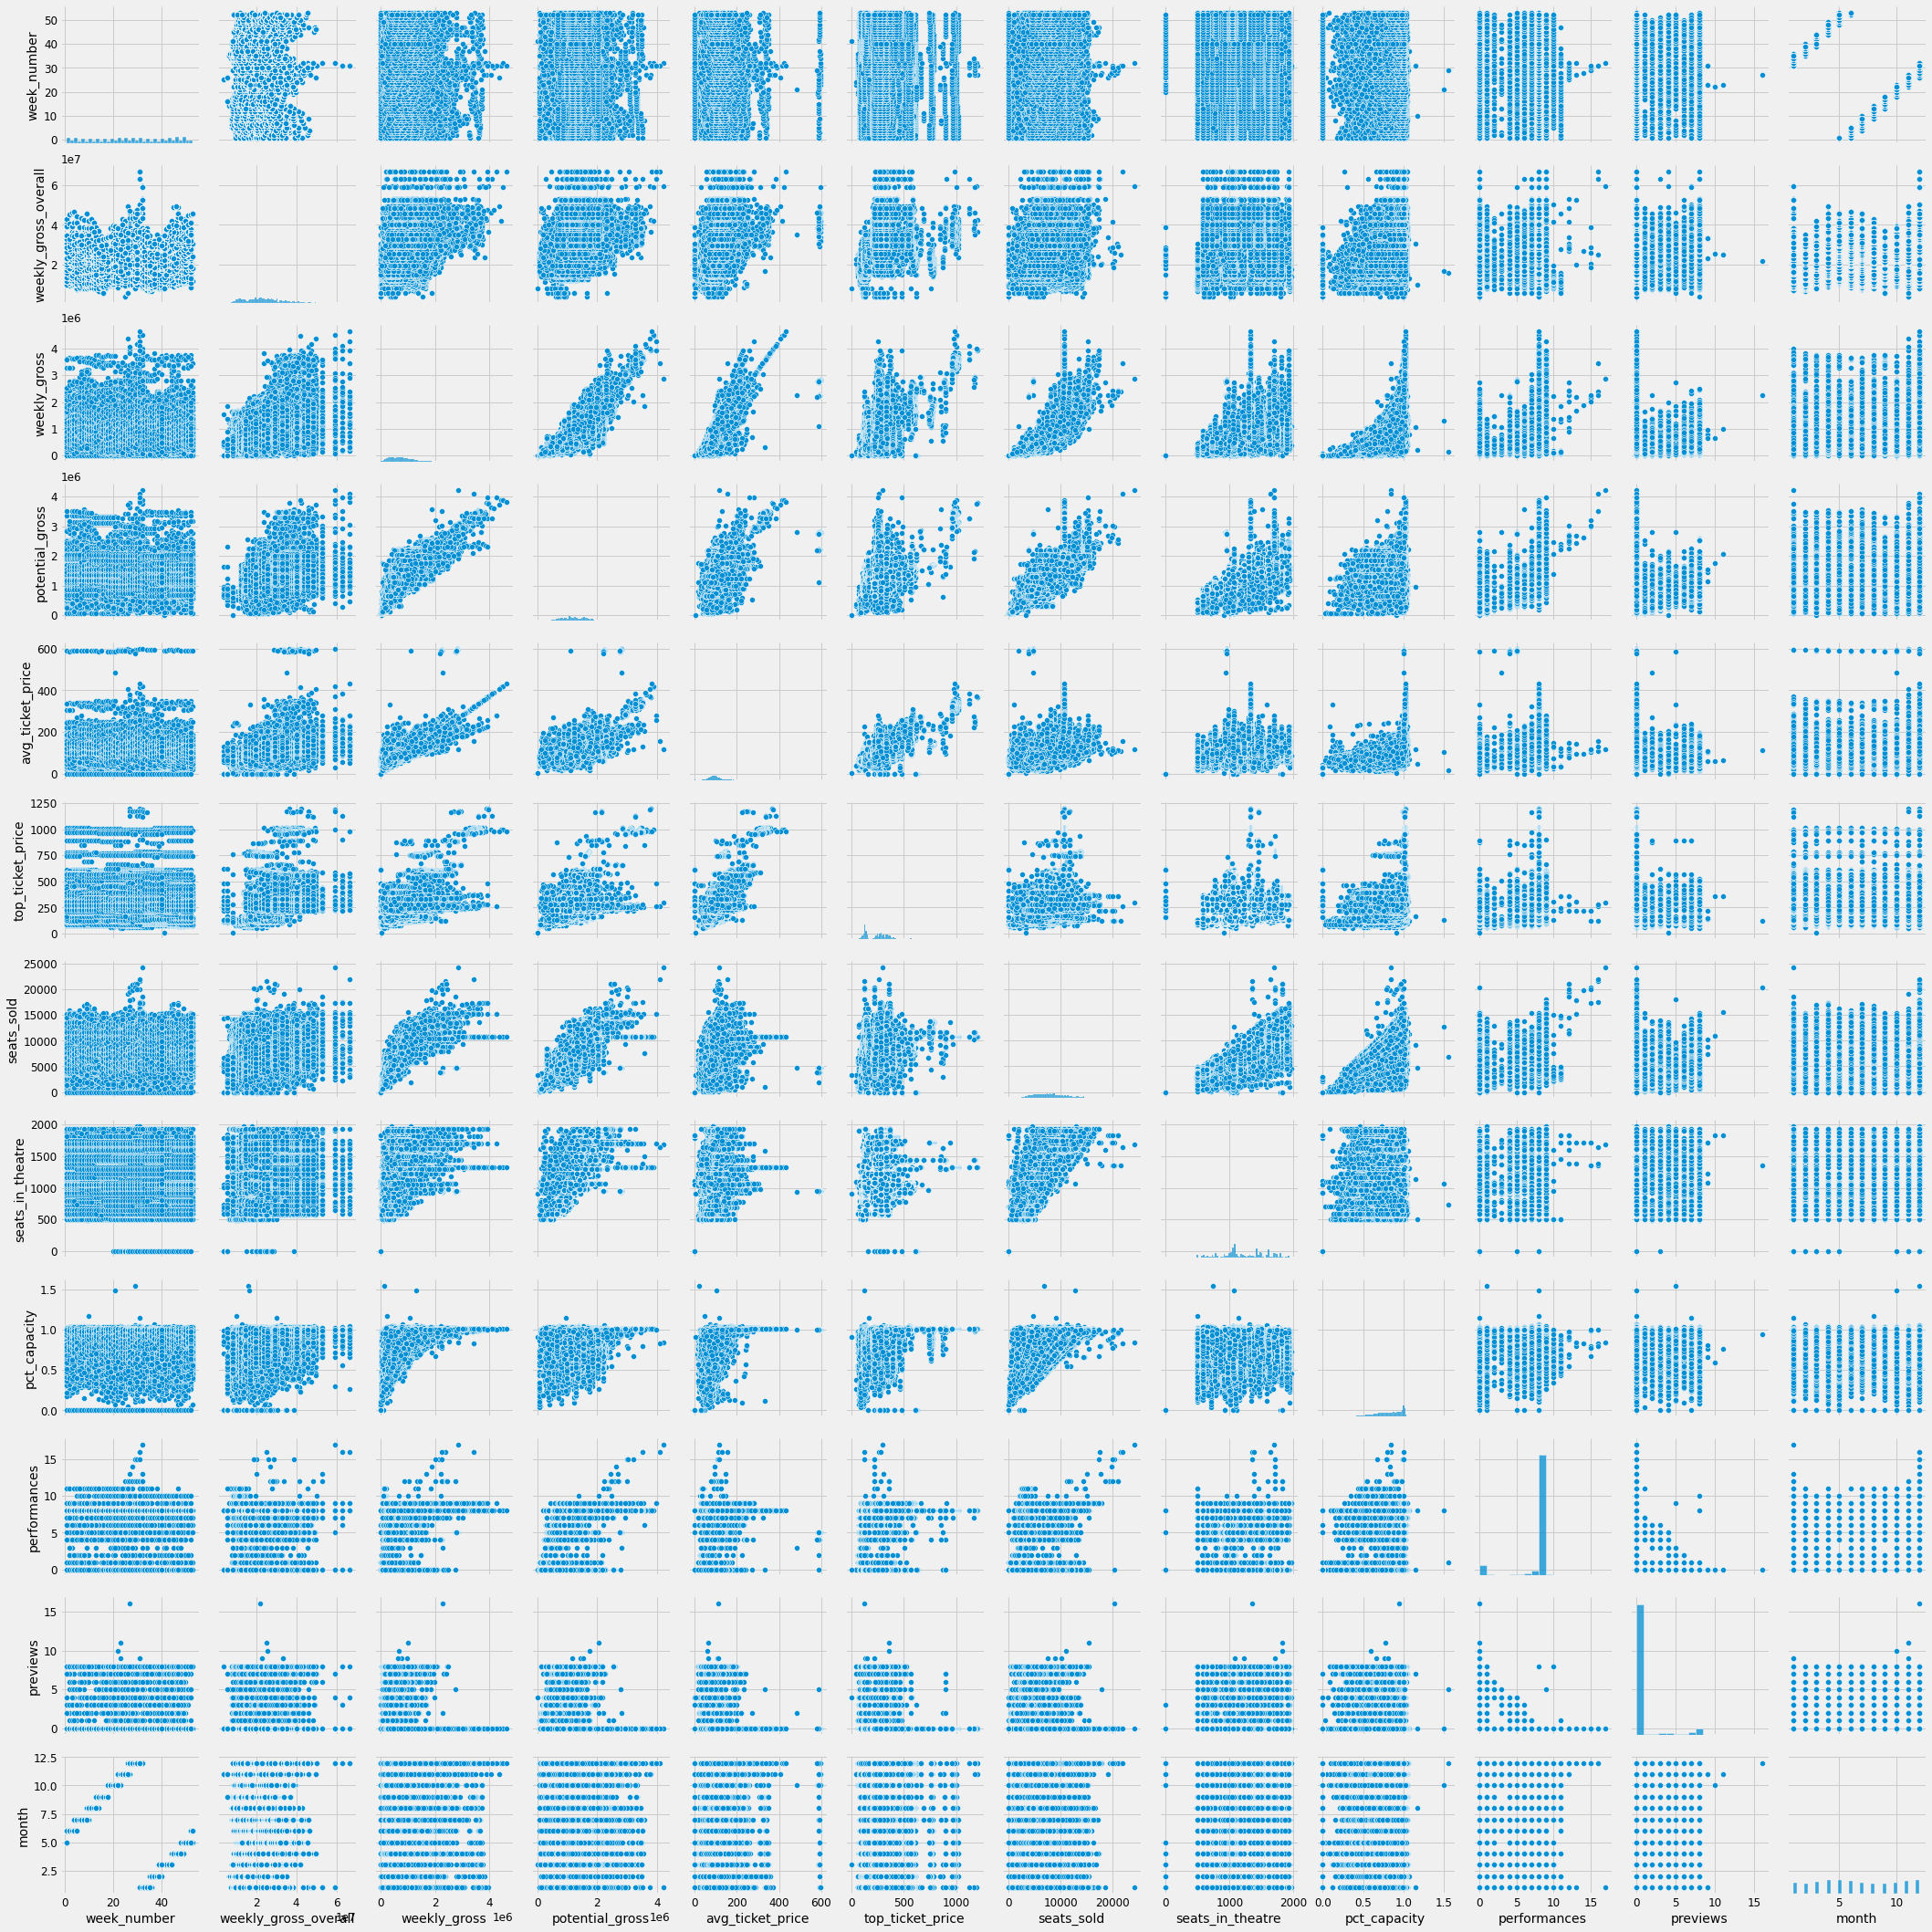

In [9]:
import seaborn as sns
sns.pairplot(gross_data)

In [11]:
corr = gross_data.corr()
corr

,week_number,weekly_gross_overall,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,month
week_number,1.000000,0.060647,-0.052853,-0.037529,-0.038121,-0.007826,-0.053439,-0.029175,-0.057615,-0.088568,0.092782,-0.442713
weekly_gross_overall,0.060647,1.000000,0.365199,0.303122,0.496158,0.459967,0.118929,-0.010151,0.245087,0.005573,0.014197,0.050972
weekly_gross,-0.052853,0.365199,1.000000,0.822470,0.801326,0.527151,0.825389,0.590953,0.632255,0.234777,-0.183400,0.027343
potential_gross,-0.037529,0.303122,0.822470,1.000000,0.568617,0.487656,0.775117,0.751210,0.291846,0.267542,-0.178968,0.016230
avg_ticket_price,-0.038121,0.496158,0.801326,0.568617,1.000000,0.668604,0.408935,0.214543,0.507050,0.149092,-0.157710,0.044712
top_ticket_price,-0.007826,0.459967,0.527151,0.487656,0.668604,1.000000,0.218634,0.098107,0.265586,0.074466,-0.061525,0.004289
seats_sold,-0.053439,0.118929,0.825389,0.775117,0.408935,0.218634,1.000000,0.812943,0.629234,0.269010,-0.173585,-0.005608
seats_in_theatre,-0.029175,-0.010151,0.590953,0.751210,0.214543,0.098107,0.812943,1.000000,0.175614,0.176412,-0.148054,0.001430
pct_capacity,-0.057615,0.245087,0.632255,0.291846,0.507050,0.265586,0.629234,0.175614,1.000000,0.069799,-0.052496,-0.019373
performances,-0.088568,0.005573,0.234777,0.267542,0.149092,0.074466,0.269010,0.176412,0.069799,1.000000,-0.924861,0.006662


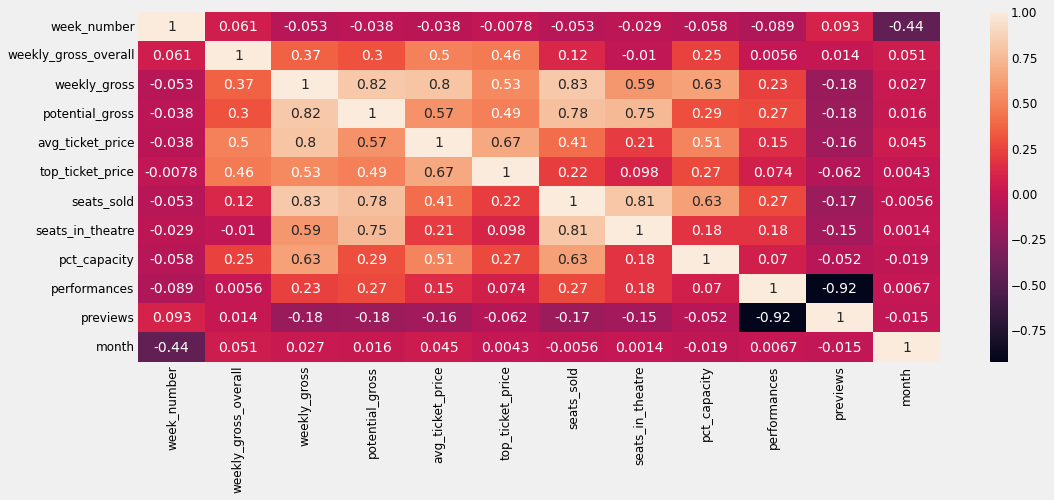

In [12]:
sns.heatmap(corr,annot=True)

Which column has missing value; ['potential_gross', 'top_ticket_price']


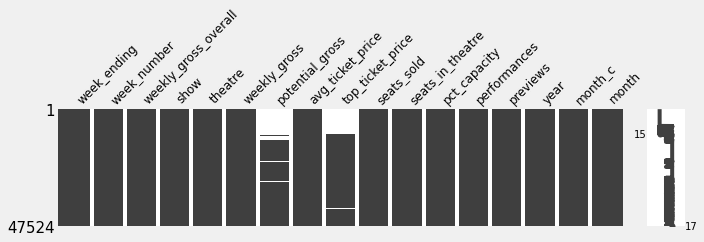

In [13]:
import missingno as msno
msno.matrix(gross_data,figsize=(10,2),fontsize=12)
print("Which column has missing value; {}".format(list(gross_data.columns[gross_data.isnull().any()])))

In [14]:
gross_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47524 entries, 0 to 47523
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   week_ending           47524 non-null  datetime64[ns]
 1   week_number           47524 non-null  int64         
 2   weekly_gross_overall  47524 non-null  float64       
 3   show                  47524 non-null  object        
 4   theatre               47524 non-null  object        
 5   weekly_gross          47524 non-null  float64       
 6   potential_gross       34911 non-null  float64       
 7   avg_ticket_price      47524 non-null  float64       
 8   top_ticket_price      36167 non-null  float64       
 9   seats_sold            47524 non-null  int64         
 10  seats_in_theatre      47524 non-null  int64         
 11  pct_capacity          47524 non-null  float64       
 12  performances          47524 non-null  int64         
 13  previews        

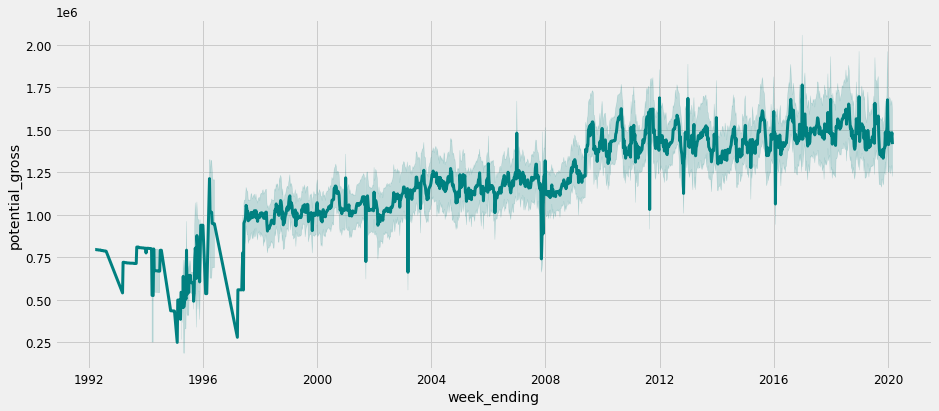

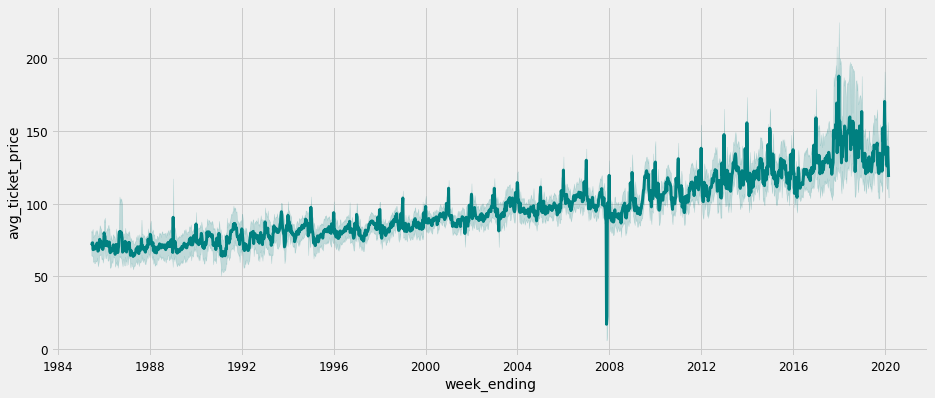

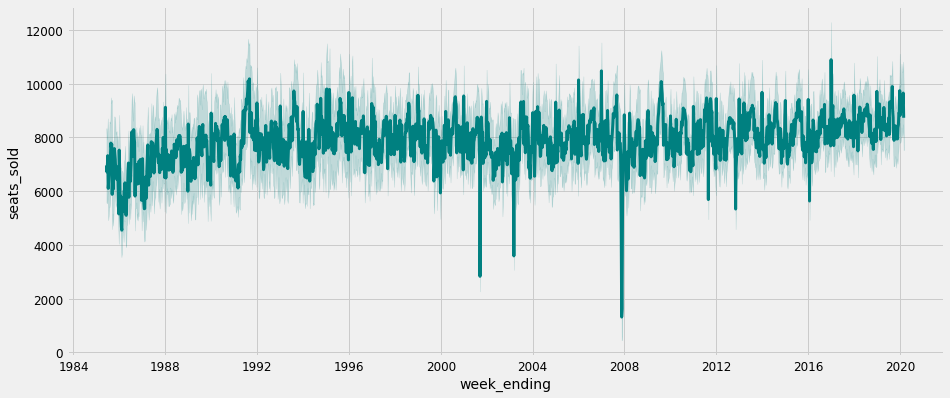

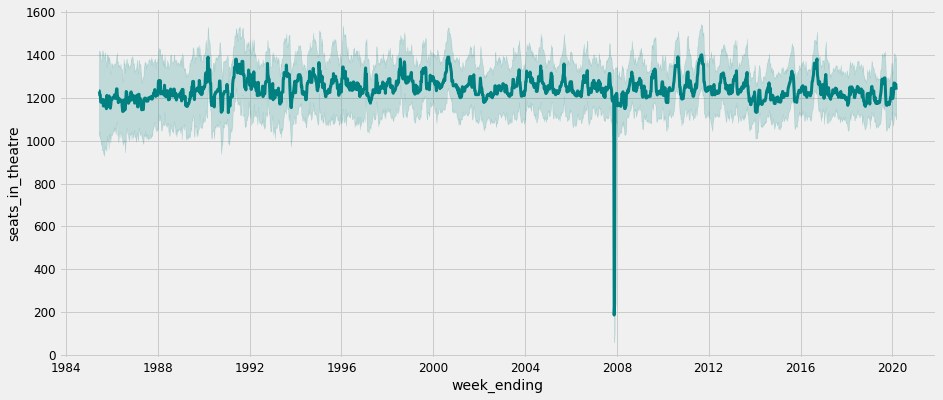

In [16]:
for i in ['potential_gross','avg_ticket_price','seats_sold','seats_in_theatre']:
    plt.figure(figsize=(14,6))
    sns.lineplot(x=gross_data['week_ending'],y=gross_data[i],color="teal",linewidth="3")

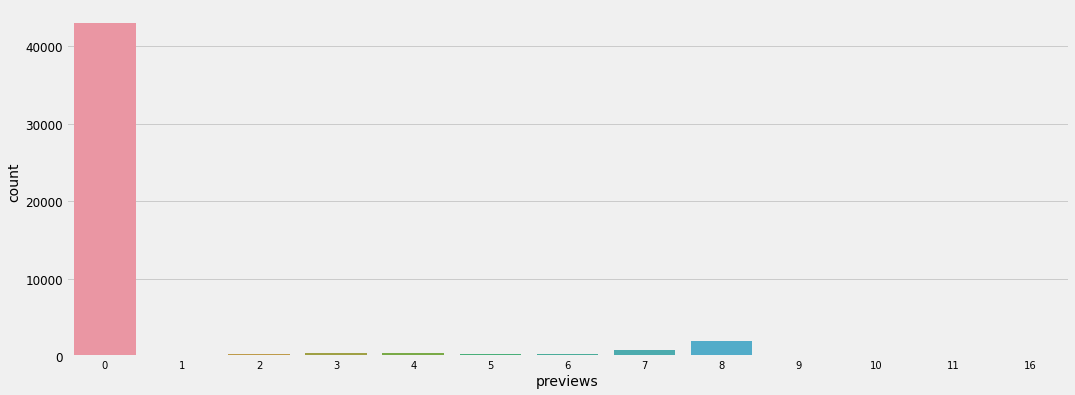

In [20]:
## For most weeks and for most shows has no previews
sns.countplot(gross_data['previews'])#,hue=gross_data['theatre'])
plt.xticks(fontsize=10)
plt.show()

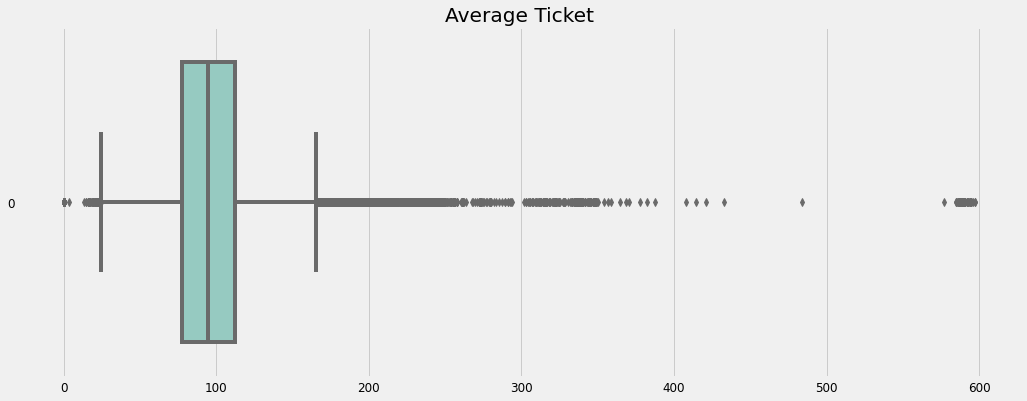

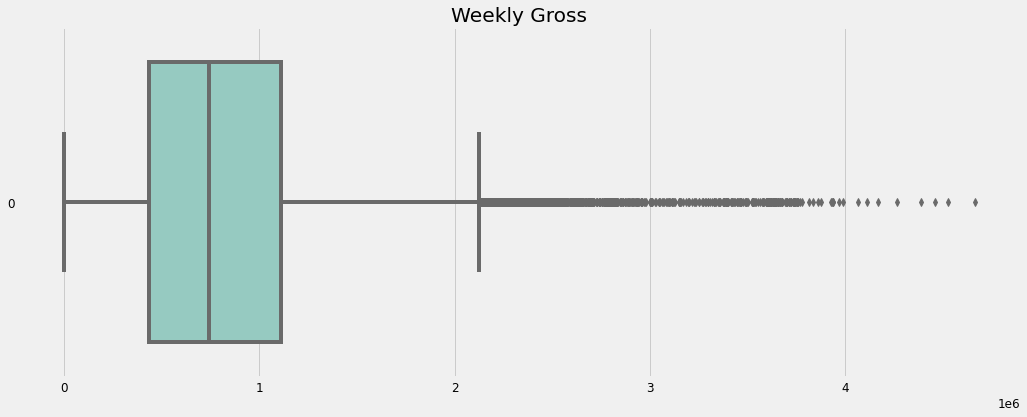

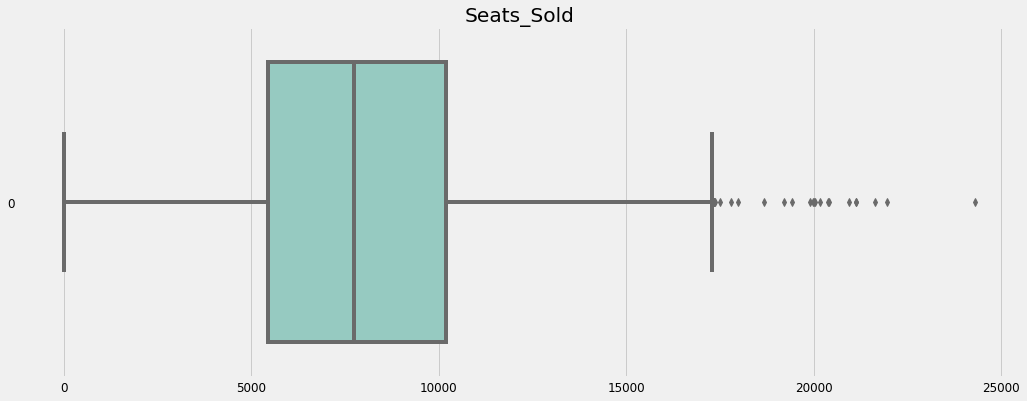

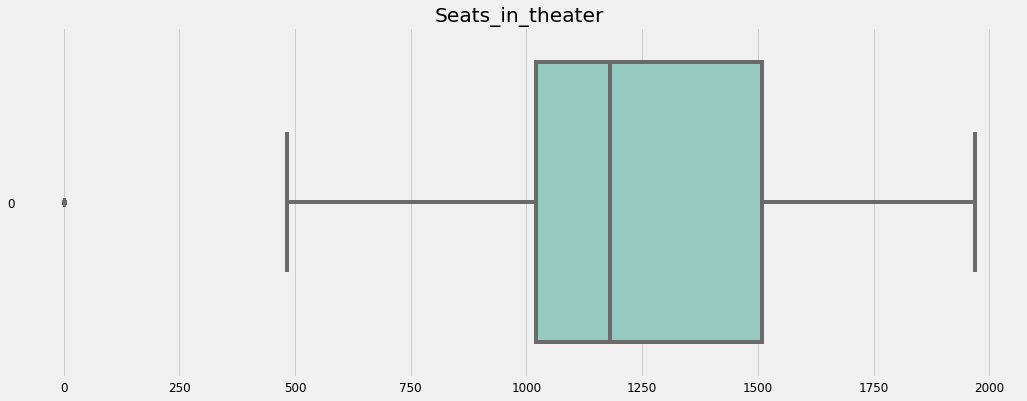

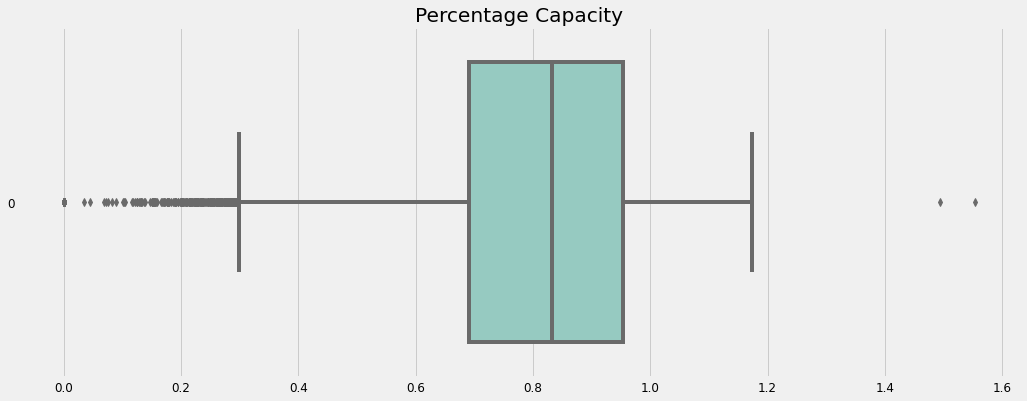

In [25]:
plt.figure(1)
sns.boxplot(data = gross_data.loc[:, "avg_ticket_price"], orient = "h", palette = "Set3")
plt.title('Average Ticket')
plt.show()
plt.figure(2)
sns.boxplot(data = gross_data.loc[:, "weekly_gross"], orient = "h", palette = "Set3")
plt.title('Weekly Gross')
plt.show()
plt.figure(3)
sns.boxplot(data = gross_data.loc[:, "seats_sold"], orient = "h", palette = "Set3")
plt.title('Seats_Sold')
plt.title('Seats_Sold')
plt.show()
plt.figure(3)
sns.boxplot(data = gross_data.loc[:, "seats_in_theatre"], orient = "h", palette = "Set3")
plt.title('Seats_in_theater')
plt.show()
plt.figure(4)
sns.boxplot(data = gross_data.loc[:, "pct_capacity"], orient = "h", palette = "Set3")
plt.title('Percentage Capacity')
plt.show()

In [23]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 3.4 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25026 sha256=b7521a340bcc584f3f6961d76a1bc94d36b883837103ff578275df811f19fe49
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=7c5b8ebc807ec0aa6da09a4ad0b6b8cb084d2fd223d3ed8250ef005c2a78006a
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [24]:
from fitter import Fitter, get_common_distributions, get_distributions

,sumsquare_error,aic,bic,kl_div
uniform,8.762381e-12,3075.003032,-1.721751e+06,inf
lognorm,1.291573e-11,3650.738482,-1.703302e+06,inf
gamma,1.336286e-11,inf,-1.701685e+06,NaN
exponpow,1.336286e-11,inf,-1.701685e+06,NaN
pareto,1.358724e-11,3597.923543,-1.700893e+06,inf


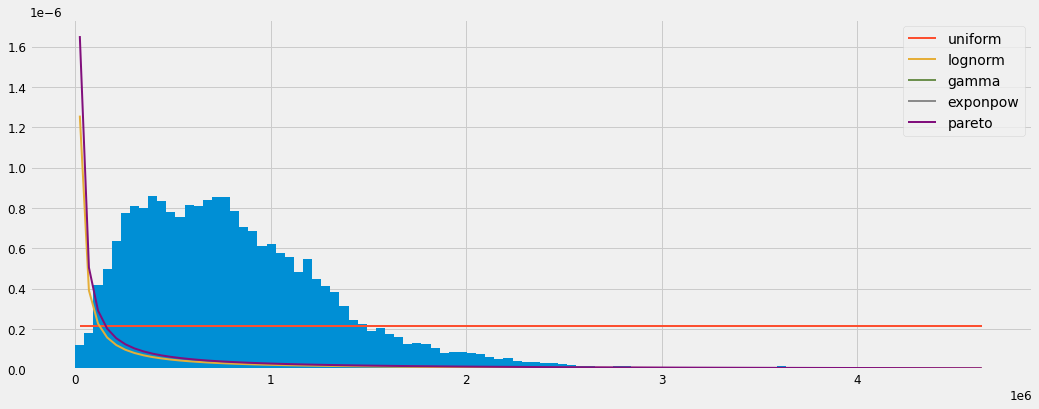

In [26]:
Potential_Gross = gross_data["weekly_gross"].values
f = Fitter(Potential_Gross,
           distributions=['gamma',
                          'lognorm',
                          'pareto','lognorm','uniform','exponpow'])
f.fit()
f.summary()

In [27]:
f.get_best(method = 'sumsquare_error')

{'uniform': {'loc': 0.0, 'scale': 4662280.008805884}}

,sumsquare_error,aic,bic,kl_div
beta,1.004112e-08,2596.625611,-1.386972e+06,inf
gamma,1.199078e-08,2344.500641,-1.378549e+06,inf
norm,1.511308e-08,2464.726218,-1.367562e+06,inf
expon,2.065519e-07,2106.671244,-1.243287e+06,inf
lognorm,4.698853e-07,2667.388461,-1.204215e+06,inf


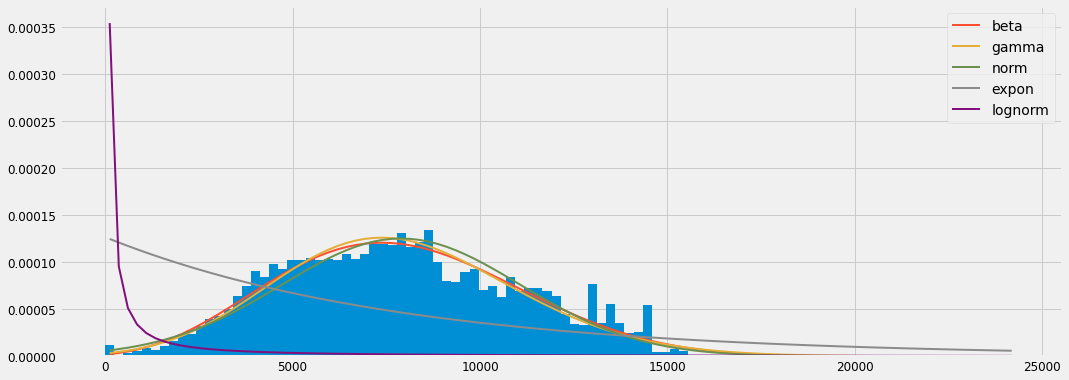

In [28]:
Seats_Sold = gross_data["seats_sold"].values
g = Fitter(Seats_Sold,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "expon",
                          "norm"])
g.fit()
g.summary()

In [29]:
g.get_best(method = 'sumsquare_error')

{'beta': {'a': 5.754654407556404,
  'b': 9.718797696765279,
  'loc': -2038.1237211698835,
  'scale': 26695.95643598376}}

,sumsquare_error,aic,bic,kl_div
gamma,0.000103,3072.016272,-948170.478926,inf
beta,0.000110,2983.058799,-944782.030236,inf
norm,0.000204,5346.686596,-915626.224170,inf
expon,0.001194,1526.717779,-831602.467162,inf
lognorm,0.002572,1734.456143,-795146.182521,inf


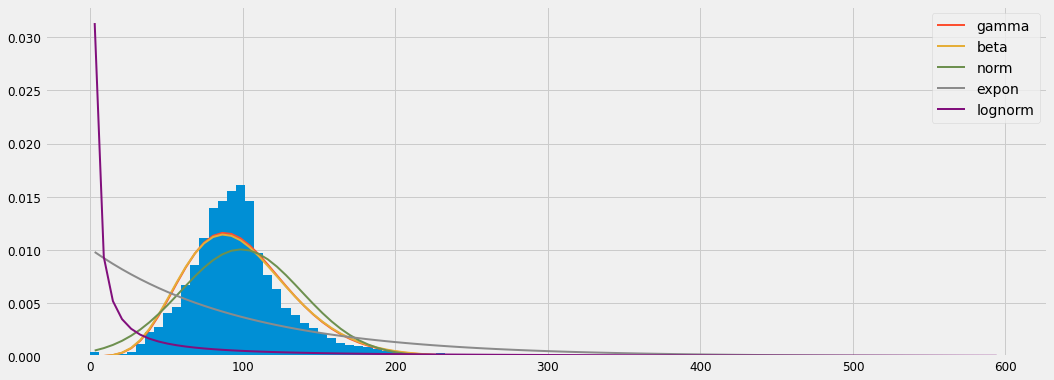

In [30]:
Average_ticket = gross_data["avg_ticket_price"].values
h = Fitter(Average_ticket,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "expon",
                          "norm"])
h.fit()
h.summary()

In [31]:
h.get_best(method = 'sumsquare_error')

{'gamma': {'a': 10.709705988622346,
  'loc': -18.16471198416081,
  'scale': 10.93059628350489}}

,sumsquare_error,aic,bic,kl_div
gamma,0.000103,3072.016272,-948170.478926,inf
beta,0.000110,2983.058799,-944782.030236,inf
norm,0.000204,5346.686596,-915626.224170,inf
expon,0.001194,1526.717779,-831602.467162,inf
lognorm,0.002572,1734.456143,-795146.182521,inf


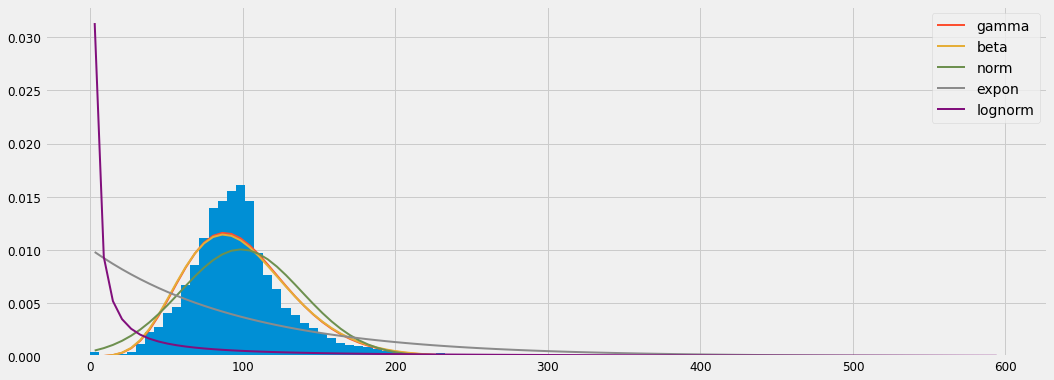

In [32]:
Seats_in_theatre = gross_data["seats_in_theatre"].values
i = Fitter(Average_ticket,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "expon",
                          "norm"])
i.fit()
plt.title('Seats in Theater')
i.summary()

In [33]:
i.get_best(method = 'sumsquare_error')

{'gamma': {'a': 10.709705988622346,
  'loc': -18.16471198416081,
  'scale': 10.93059628350489}}

,sumsquare_error,aic,bic,kl_div
norm,31.228589,489.183088,-348217.991553,inf
lognorm,31.302763,497.129923,-348094.477557,inf
gamma,33.042334,488.327929,-345524.226964,inf
beta,39.611145,333.780619,-336896.362136,inf
expon,112.024939,153.592356,-287511.427555,inf


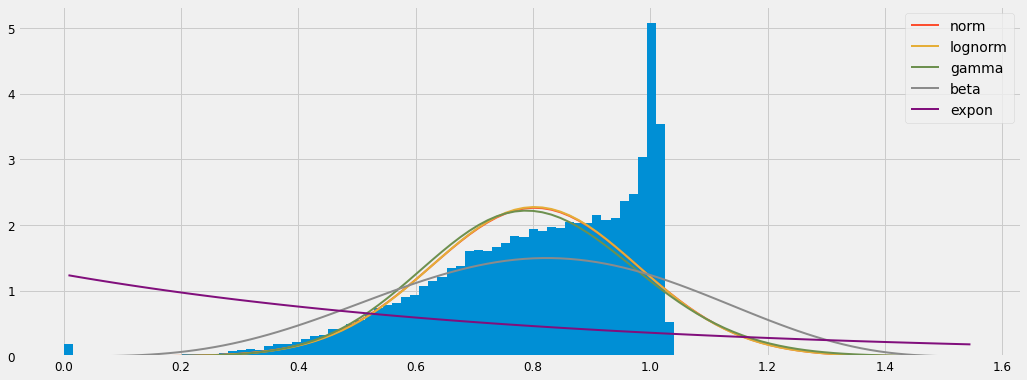

In [34]:
cap = gross_data["pct_capacity"].values
u = Fitter(cap,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "expon",
                          "norm"])
u.fit()
u.summary()

In [35]:
u.get_best(method = 'sumsquare_error')

{'norm': {'loc': 0.8027525608113795, 'scale': 0.17641645269159784}}